# Hadoop 실행:workers파일 작성 및 공개키 복사를 수행한 경우

* hadoop에서는 보안상의 문제로 해당 셀 스크립트를 root권한으로 실행할 수 없게 해놓음(sudo 사용 불가능)
* 따라서 /usr/local/hadoop폴더에 유저 'ubuntu'를 소유자로 등록하고, 읽기, 쓰기, 실행 권한을 가지도록 설정(모든 서버에 적용 필요)
* 만약 해당 명령어로도 여전히; Hadoop실행 명령어가 실행되지 않는다면 아래의 'Hadoop실행:workers파일에 host를 기입하지 않은 경우'를 먼저 실행하여 설정에 의해 생성된 디렉토리들을 먼저 생성한 후, 다시 권한 설정 진행

In [ ]:
# 유저 ubuntu를 /usr/local/hadoop의 소유자로 설정
sudo chown -R ubuntu:ubuntu /usr/local/hadoop
    
# 소유자에게 읽기:쓰기:실행 권한 부여
sudo chmod -R 700 /usr/local/hadoop

In [ ]:
# [master] 처음 HDFS클러스터를 시작하는 경우 초기화 과정(포맷)필요
sudo $HADOOP_HOME/bin/hdfs namenode -format

## HDFS

In [ ]:
# [master]다음의 명령어를 수행하여 HDFS와 관련된 데몬을 모두 구동
$HADOOP_HOME/sbin/start-dfs.sh

## YARN

In [ ]:
# [master]다음의 명령어를 수행하여 YARN와 관련된 데몬을 모두 구동
$HADOOP_HOME/sbin/start-yarn.sh

## MapReduce

In [ ]:
# [master]다음의 명령어를 수행하여 JobHistoryServer 구동
sudo $HADOOP_HOME/bin/mapred --daemon start historyserver

## 또는 다음과 같이 한번에 실행할 수 있다

In [ ]:
# [master]에서 다음의 명령어 실행
$HADOOP_HOME/sbin/start-all.sh

# Hadoop 실행:workers파일에 host를 기입하지 않은 경우

In [ ]:
# [master] 처음 HDFS클러스터를 시작하는 경우 초기화 과정(포맷)필요
# NameNode가 존재하는 master에서 다음의 명령어 실행
# HADOOP_PID_DIR, dfs.namenode.name.dir등 설정한 디렉토리들 생성 또는 초기화
# 간혹 위의 start-dffs.sh에서 오류가 나는경우 초기화를 해주고 자시 실행하는 방법돟 존재한다
sudo $HADOOP_HOME/bin/hdfs namenode -format

## HDFS

In [ ]:
# [master] NameNode 시작
sudo $HADOOP_HOME/bin/hdfs --daemon start namenode

In [ ]:
# [worker01] Secondary NameNode 시작
sudo $HADOOP_HOME/bin/hdfs --daemon start namenode

In [ ]:
# [worker01, worker02, worker03] DataNode 시작
# worker01
sudo $HADOOP_HOME/bin/hdfs --daemon start datanode
# worker02
sudo $HADOOP_HOME/bin/hdfs --daemon start datanode
# worker03
sudo $HADOOP_HOME/bin/hdfs --daemon start datanode

## YARN

In [ ]:
# [master] ResourceManager 구동
sudo $HADOOP_HOME/bin/yarn --daemon start resourcemanager

In [ ]:
# [worker01, worker02, worker03] NodeManager 구동
# worker01
sudo $HADOOP_HOME/bin/yarn --daemon start nodemanager
# worker02
sudo $HADOOP_HOME/bin/yarn --daemon start nodemanager
# worker03
sudo $HADOOP_HOME/bin/yarn --daemon start nodemanager

In [ ]:
# [master] ResourceManager가 존재하는 master에서 WebProxyServer 구동
# yarn-site.xml에서 yarn.web-proxy.address파라미터가 정의되지 않았으므로 데몬은 실행되지 않음, 명령어 참조만 할것
sudo $HADOOP_HOME/bin/yarn --daemon start proxyserver

## MapReduce

In [ ]:
# [master] Job History Server구동
sudo $HADOOP_HOME/bin/mapred --daemon start historyserver

# Hadoop 구동 확인

* Hadoop데몬의 실행여부는 Java에서 제공하는 JPS를 이용하여 확인 가능
* JPS(Java virtual machine Process Status tool): JVM(Java Virtual Machine)에서 실행 중인 Java프로세스를 보여주는 명령어
* 프로세스 앞의 숫자는 현재 시스템에서 실행 중인 Java어플리케이션의 프로세스 식별자
* JSP명령어를 사용했을 때 프로세스명이 각 가상머신에 다음과 같이 출력되야 함

In [ ]:
# [master, worker01, worker02, worker03]에서 각각 실행
sudo jps

* master

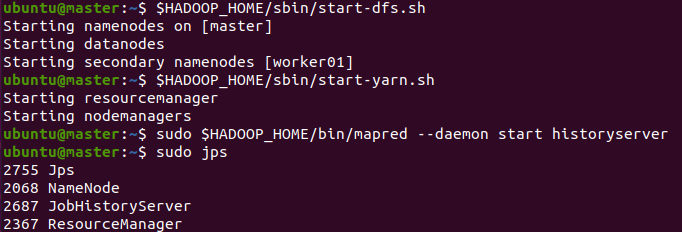

* worker01

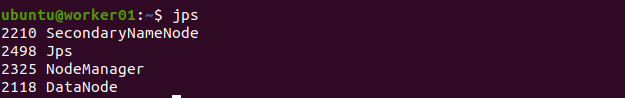

* worker02

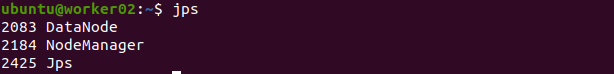

* worker03

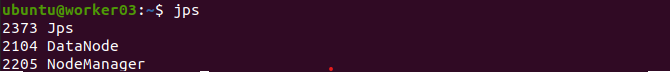

* Hadoop은 사용자 편의를 위하여 웹 인터페이스를 제공
* 웹 브라우저에서 '{NameNode가 존재하는 master의 ip}:9870' (etc/hadoop/hdfs-site.xml의 dfs.namenode.http-address파라미터에 작성한 ip주소 및 포트)입력 시 현재 Hadoop에 대한 정보 확인 가능

* 우분투 내에 브라우저에서 master:9870을 입력하면 아래와 같이 웹사이트 상에서 정보를 확인할 수 있다.

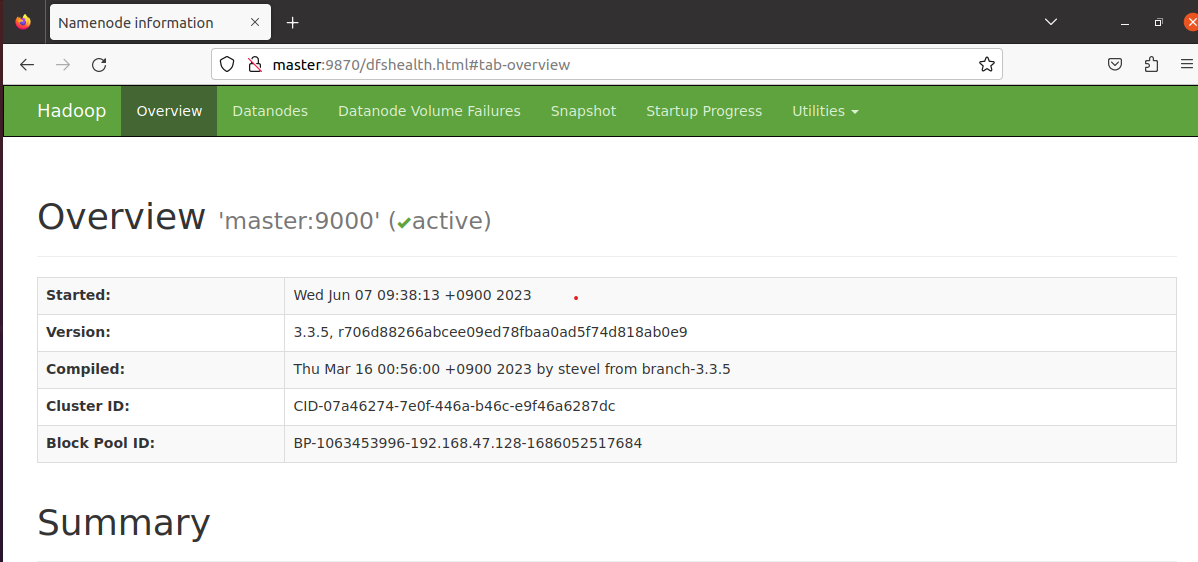

# Hadoop 종료:workers파일 작성 및 공개키 복사를 수행한 경우

## HDFS

In [ ]:
# [master] HDFS와 관련된 데몬을 모두 종료
$HADOOP_HOME/sbin/stop-dfs.sh

## YARN

In [ ]:
# [master] YARN와 관련된 데몬을 모두 종료
$HADOOP_HOME/sbin/stop-yarn.sh

## MapReduce

In [ ]:
# [master] Job History Server 종료
sudo $HADOOP_HOME/bin/mapred --daemon stop historyserver

## 또는 다음과 같이 한번에 종료할 수 있다

In [ ]:
# [master]에서 다음의 명령어 실행
$HADOOP_HOME/sbin/stop-all.sh

# Hadoop 종료:workers파일에 host를 기입하지 않은 경우

## HDFS

In [ ]:
# [master] NameNode 종료
sudo $HADOOP_HOME/bin/hdfs --daemon stop namenode

In [ ]:
# [worker01] Secondary NameNode 종료
sudo $HADOOP_HOME/bin/hdfs --daemon stop secondarynamenode

In [ ]:
# [worker01, worker02, worker03] DataNode 종료
# worker01
sudo $HADOOP_HOME/bin/hdfs --daemon stop datanode
# worker02
sudo $HADOOP_HOME/bin/hdfs --daemon stop datanode
# worker03
sudo $HADOOP_HOME/bin/hdfs --daemon stop datanode

## YARN

In [ ]:
# [master] ResourceManager 종료
sudo $HADOOP_HOME/bin/yarn --daemon stop resourcemanager

In [ ]:
# [worker01, worker02, worker03] NodeManager 종료
# worker01
sudo $HADOOP_HOME/bin/yarn --daemon stop nodemanager
# worker02
sudo $HADOOP_HOME/bin/yarn --daemon stop nodemanager
# worker03
sudo $HADOOP_HOME/bin/yarn --daemon stop nodemanager

In [ ]:
# [master] WebAppProxyServer 종료
sudo $HADOOP_HOME/bin/yarn --daemon stop proxyserver

## MapReduce

In [ ]:
# [master] Job History Server종료
sudo $HADOOP_HOME/bin/mapred --daemon stop historyserver

# 별도의 가상머신을 통해 새로운 환경 생성

## 1. 파일 복사 및 준비

* 기존에 사용했던 master파일을 복사하여 별도의 가상머신을통해 수정작업을 거쳐 하둡을 실행하기 까지 시도해봤다.
* Ubuntu폴더를 생성했던 D드라이브에 Ubuntu2라는 새 폴더를 생성한다.
* Ubuntu에서 Master폴더를 복사하여 Ubuntu2에 Master, Worker01폴더에 각각 복사한다.
* VMWare를 실행 후 'copy it'을 선택 후 부팅한다.

## 2. 파일 수정

* 대부분의 작업을 master와 worker01 동시에 진행했다.

In [ ]:
# master와 worker동일하게 실행
# ip주소를 확인 하여 변경된 주소를 확인
ip addr show

In [ ]:
# master와 worker동일하게 실행
# 변경된 ip주소를 수정해준다
# 기존 Ubuntu에서 실행했던 ip주소를 삭제 후 새로운 master와 worker01의 주소를 추가 해준다
sudo vi /etc/hosts

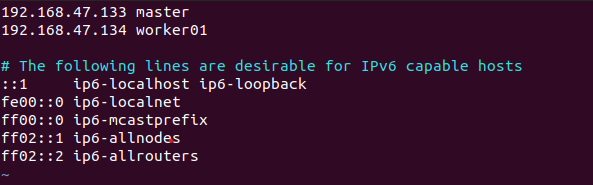

In [ ]:
# 호스트명을 확인, worker01의 경우 hostname을 worker01로 수정해주어야 한다
sudo vi /etc/hostname

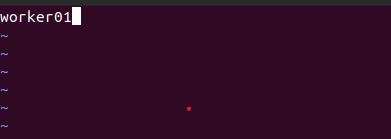

In [ ]:
# master와 worker동일하게 실행
# hadoop이라는 새 user 생성
sudo useradd -m hadoop -s /bin/bash

# 새로운 패스워드 생성
sudo passwd hadoop

* master

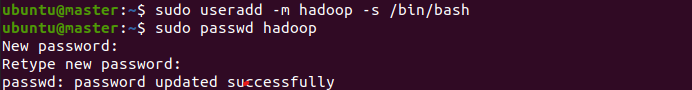

* worker01

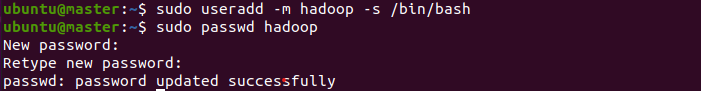

In [ ]:
# hadoop으로 접속
su hadoop

In [ ]:
# master와 worker동일하게 실행
# 키 생성
ssh-keygen -t rsa

# 키가 생성되었는지 확인
cd /home/hadoop/.ssh

# 키 복사
ssh-copy-id hadoop@master
ssh-copy-id hadoop@worker01

In [ ]:
# master와 worker동일하게 실행
# 먼저 재부팅을 실시해주고 ubuntu로 접속한다
# ubuntu의 접속권한을 hadoop에게 양도한다
sudo chown -R hadoop:hadoop /usr/local/hadoop
sudo chmod -R 700 /usr/local/hadoop


# 이후 재부팅을 진행
# 부팅 후에 master, worker01에서 각각 원격접속이 원활하게 되는지 확인한다
ssh hadoop@worker01
ssh hadoop@master

In [ ]:
# master와 worker동일하게 실행
# master와 worker에 다음의 경로를 추가해준다
echo 'export JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"' >> ~/.bashrc
echo 'export HADOOP_HOME="/usr/local/hadoop"' >> ~/.bashrc
source ~/.bashrc

In [ ]:
# master와 worker동일하게 실행
# hadoop으로 실행중이므로 위의 경우 sudo를 사용하지 못한다
# 다음의 명령어를 통해 변경사항을 저장한다
# 3을 1로 변경
vi $HADOOP_HOME/etc/hadoop/hdfs-site.xml

# worker01만 남기고 제거
vi $HADOOP_HOME/etc/hadoop/workers

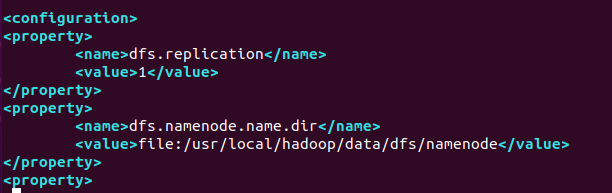

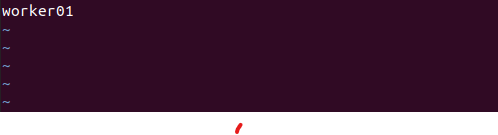

## 3. Hadoop 실행

In [ ]:
# master 에서 다음을 반복해준다(이미 존재하면 오류가 나므로 상관이없다)
ssh-copy-id hadoop@master
ssh-copy-id hadoop@worker01

In [ ]:
# master에서 hadoop포맷을 실행해준다
$HADOOP_HOME/bin/hdfs namenode -format

In [ ]:
# 명령어를 통해 하둡을 실행
$HADOOP_HOME/sbin/start-dfs.sh
$HADOOP_HOME/sbin/start-yarn.sh
$HADOOP_HOME/bin/mapred --daemon start historyserver
# 만약 NameNode가 실행이 되지 않는다면
$HADOOP_HOME/bin/hdfs --daemon start namenode

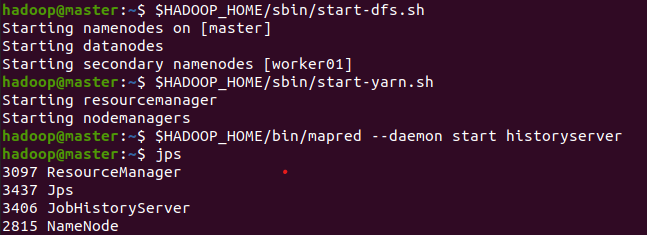

## 4. 하둡 테스트

In [ ]:
# 파일 확인
$HADOOP_HOME/bin/hadoop fs -ls /

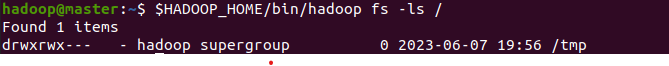

In [ ]:
# 경로 단순화
# 위의 일괄 시작에서 경로를 굳이 다 입력안하고 start-all.sh, stop-all.sh만 입력하면 실행이 된다.
echo 'export PATH=$PATH:$HADOOP_HOME/bin' >> ~/.bashrc
echo 'export PATH=$PATH:$HADOOP_HOME/sbin' >> ~/.bashrc
source ~/.bashrc

In [ ]:
# 디렉토리 생성
mkdir test2
ls

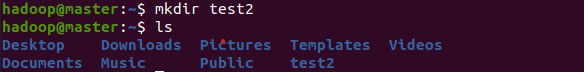

In [ ]:
# 텍스트 파일 생성
# 빈 파일이므로 나오는 것이 없을 것이다
cd test2
touch file.txt
cat file.txt

In [ ]:
# 내용 추가
echo "Hello World" > file.txt
cat file.txt

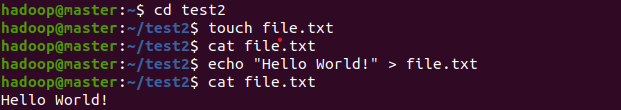

In [ ]:
# 업로드
hadoop fs -put file.txt /file.txt
hadoop fs -ls /

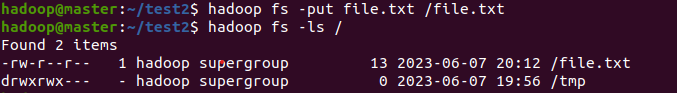

In [ ]:
# 파일 내려받기(다운로드)
hadoop fs -get /file.txt file2.txt
ls

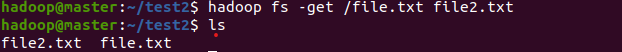

In [ ]:
# 파일 복사
hadoop fs -cp /file.txt /file3.txt
hadoop fs -ls /

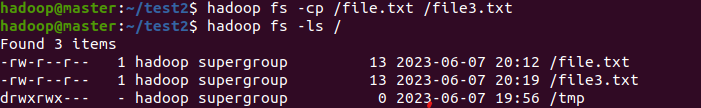

In [ ]:
# 파일 삭제
hadoop fs -rm /file3.txt

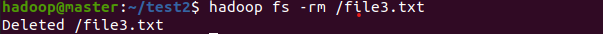

In [ ]:
# 사용자 허가권 변경
# 소유자에게만 읽기, 쓰기, 실행 권한을 부여
hadoop fs -chmod 700 /file.txt
hadoop fs -ls /

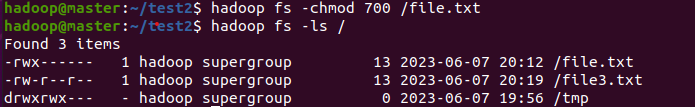

In [ ]:
# 원상복귀
# 원 자료는 소유자에게는 읽기, 쓰기권한, 나머지 소유그룹, 다른 사용자에게는 읽기권한만 부여
hadoop fs -chmod 644 /file.txt
hadoop fs -ls /

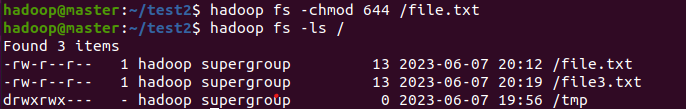

In [ ]:
# 사용자 소유권 변경
hadoop fs -chown tester /file.txt
hadoop fs -ls /

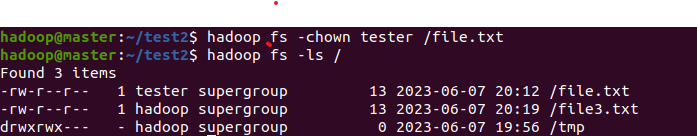

In [ ]:
# 디렉토리 생성
hadoop fs -mkdir /test
hadoop fs -ls /

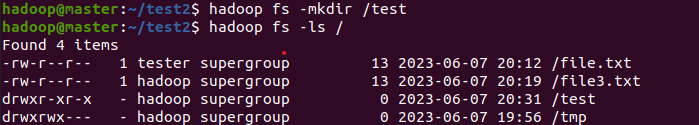